### 0. Computer vision libaries in PyTorch
*[`torchvision`](https://www.learnpytorch.io/03_pytorch_computer_vision/) - base
domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer
vision here
* `torchvision.models` - get pretrained computer vision models that you can
leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images)
to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset.

In [74]:
# Import Pytorch 
import torch
from torch import nn

# Import Torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)



2.0.1
0.15.2


## 1. Getting a dataset
The dataset we'll be using is the [Fashion-MNIST] from torchvision.datasets.


In [75]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # where to download to?
    train=True, # do we want the training dataset?
    download=True, # do we want to download yes/no?
    transform=ToTensor(), # how do we want to transform the data?
    target_transform=None #how do we want to transform the labels/targets?
)

# Setup test data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)




In [76]:
len(train_data), len(test_data)

(60000, 10000)

In [77]:
# See the first training sample
image, label = train_data[0]
image, label


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [78]:
class_names = train_data.classes
class_names


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [79]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [80]:
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image Label: {label}, {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image Label: 9, Ankle boot


###

### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

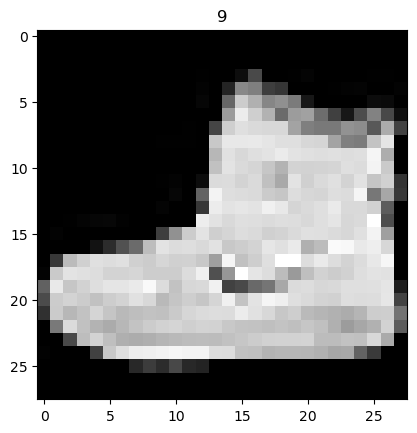

In [81]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap="gray")
plt.title(label)


(-0.5, 27.5, 27.5, -0.5)

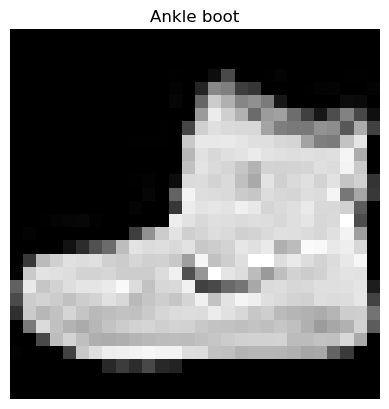

In [82]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

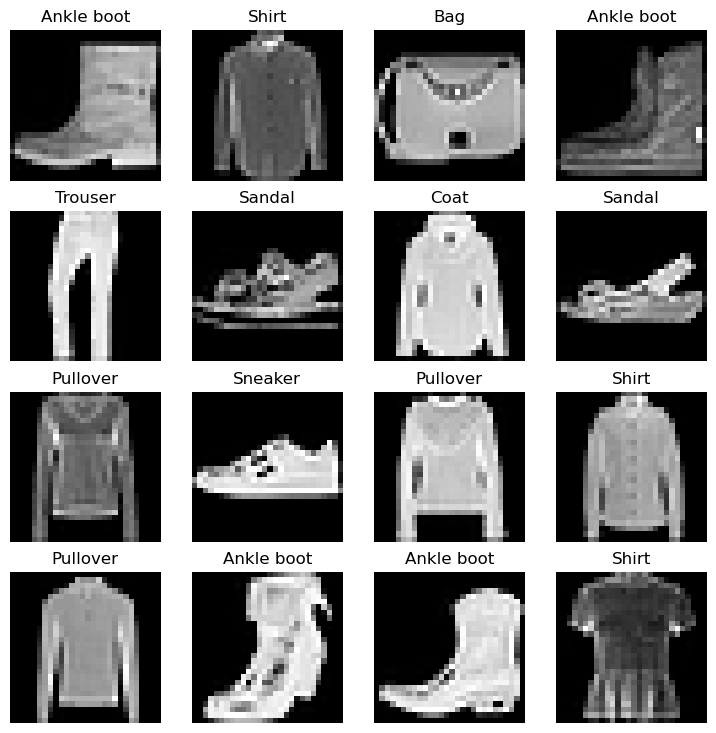

In [83]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=(1,)).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

Do you think these items of clothing (images) could be modelled with pure linear
lines? Or do you think we'll need non-linearities?

In [84]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

### 2. Prepare DataLoader
Right now, our data is in the form of PyTorch Datasets.
DataLoader turns our dataset into a Python iterable

More specifically, we want to turn our data into batches (or mini-batches)

Why would we do this?
1. It is more computationally efficient, as in, your computing hardware may not be
able to look (store in memory) at 60000 images in one hit. So we break it down to
32 images at a time (batch size of 32).

2. It gives our neural network more chances to update its gradients per epoch.

In [85]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterable (batches)
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x17568fbb0>,
 <torch.utils.data.dataloader.DataLoader at 0x17568feb0>)

In [86]:
# Let's check out what what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x17568fbb0>, <torch.utils.data.dataloader.DataLoader object at 0x17568feb0>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [87]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


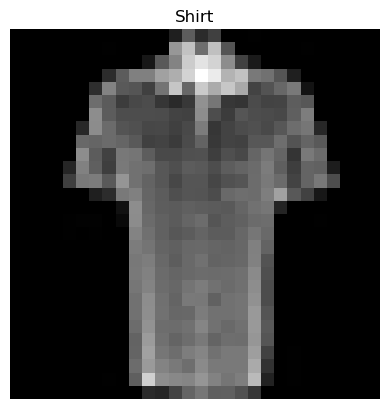

In [88]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()

img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap="gray")  
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

### 3. Model 0: Build a baseline model
When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent
models/experiments

In other words: start simply and add complexity when necessary.


In [89]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels * height * width]")


Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels * height * width]


In [90]:
from torch import nn
class FashionMNISTModel(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)                 
        )
    def forward(self, x):
        return self.layer_stack(x)

In [91]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModel(input_shape=784, # this is 28*28=784
                            hidden_units=10, # how many units in the hidden layer
                            output_shape=len(class_names)).to("cpu") # one for every class

model_0



FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [92]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [93]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class data, our loss function will
be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer 'torch.optim.SGD()' (stochastic gradient descent)
* Evaluation metric - since we're working on a classification problem, let's use
accuracy as our evaluation metric.


In [94]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
    print("helper_functions.py exists, skipping download...")
else:
    print("Downloading helper_functions.py...")
    request = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"
    with open("helper_functions.py", "wb") as f:
        response = requests.get(request)
        f.write(response.content)

helper_functions.py exists, skipping download...


In [95]:
# Import accuracy metric from helper_functions.py
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### 3.2 Creating a function to time our experiments

Machine learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs.



In [96]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    """Prints difference between start and end time."""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [97]:
start_time = timer()
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")


Train time on cpu: 0.000 seconds


2.391700036241673e-05

# UPTOHERE: 3.3 Creating a training loop and training a model on batches of data...
# Highlight that the optimizer will update a model's parameters once per batch rather than once per epoch...

### 3.3 Creating a training loop and training a model on batches of data

### 3.3 Creating a training loop and training a model on batches of data
1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss
*per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss
*per batch*.
4. Print out what's happening.
5. Time it all (for fun).

In [98]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train() # put model into training mode
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss Backwards
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out what's happening
        if batch % 400 == 0:
            print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples.")

# Divide total train loss by length of train dataloader
train_loss /= len(train_dataloader)

### Testing
test_loss, test_acc = 0, 0
model_0.eval() # put model into evaluation mode
with torch.inference_mode():
    for X_test, y_test in test_dataloader:
        # 1. Forward pass
        test_pred = model_0(X_test)

        # 2. Calculate loss (accumulatively)
        test_loss += loss_fn(test_pred, y_test)

        # 3. Calculate accuracy
        test_acc += accuracy_fn(y_true=y_test,
                                y_pred=test_pred.argmax(dim=1))
        
        # Calculate the test lost average per batch
        test_loss /= len(test_dataloader)

        # Calculate the test acc average per batch
        test_acc /= len(test_dataloader)

    # Print out what's happening
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")

    # Calculate training time
    train_time_end_on_cpu = timer()
    total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                                end=train_time_end_on_cpu,
                                                device=str(next(model_0.parameters()).device))
    






  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 33%|███▎      | 1/3 [00:08<00:16,  8.18s/it]

Epoch: 1
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 67%|██████▋   | 2/3 [00:12<00:05,  5.86s/it]

Epoch: 2
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


100%|██████████| 3/3 [00:16<00:00,  5.47s/it]



Train loss: 0.4532 | Test loss: 0.0013, Test accuracy: 0.2604
Train time on cpu: 16.910 seconds


## 4. Make predictions and get Model 0 results


In [99]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader."""
    loss, acc = 0, 0
    model.eval() # put model into evaluation mode
    with torch.inference_mode():
        for X, y in data_loader:
            # 1. Forward pass make predictions
            y_pred = model(X)

            # 2. Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)

            # 3. Calculate accuracy
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class,
            "model_loss": loss.item(),
            "model_acc": acc}
# Calculate model_0 results on a test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

            
            


{'model_name': 'FashionMNISTModel',
 'model_loss': 0.5108762979507446,
 'model_acc': 82.37819488817891}

## 5. Setup device agnostic-code (for using a GPU if there is one)

In [100]:
# Setup device agonistic code
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

## 6. Model 1: Building a better model with non-linearity

We learned about the power of non-linearity in notebook 02 -



In [101]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into a single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()                
        )
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [102]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device) # send to the GPU if it's available
next(model_1.parameters()).device # check out the device of the first layer

device(type='cpu')

### 6.1 Setup loss, optimizer and evaluation metrics

In [103]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # measure how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1) # tries to update our model's parameters to reduce the loss

### 6.2 Functionizing training and evaluation/testing loops
Let's create a function for:
* training loop - `train_step()`
* testing loop - `test_step()`

In [104]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    """Performs a training with model trying to learn on dataloader"""
### Training
    train_loss, train_acc = 0, 0

    # Put model into training mode
    model.to(device)

    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(data_loader):
        # Put data on target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss and accuracy (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()
    

        # 4. Loss Backwards
        loss.backward()

        # 5. Optimizer step (update the model's parameters once *per batch*)
        optimizer.step()

        # Print out what's happening
        if batch % 400 == 0:
            print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples.")

    # Divide total train loss and accuracy by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f}, Train accuracy: {train_acc:.2f}%")





In [105]:
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [106]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn)
    test_step(model=model_1,
              data_loader=test_dataloader,loss_fn=loss_fn,
              accuracy_fn=accuracy_fn)
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu, end=train_time_end_on_gpu, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 1.09199, Train accuracy: 61.34%


 33%|███▎      | 1/3 [00:05<00:11,  5.76s/it]

Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.78101, Train accuracy: 71.93%


 67%|██████▋   | 2/3 [00:10<00:05,  5.30s/it]

Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.67027, Train accuracy: 75.94%


100%|██████████| 3/3 [00:15<00:00,  5.03s/it]

Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cpu: 15.098 seconds


**Note:** Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU.

Why is this?

1. It could be that the overhead for copying data/model to and from the GPU
outweighs the compute benefits offered by the GPU.

2. The hardware you're using has a better CPU in terms compute capability than
the GPU

In [107]:
model_0_results

{'model_name': 'FashionMNISTModel',
 'model_loss': 0.5108762979507446,
 'model_acc': 82.37819488817891}

In [108]:
total_train_time_model_0

16.909968124999978

In [109]:
model_1_results = eval_model(model=model_1,
                                data_loader=test_dataloader,
                                loss_fn=loss_fn,
                                accuracy_fn=accuracy_fn)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [110]:
model_0_results

{'model_name': 'FashionMNISTModel',
 'model_loss': 0.5108762979507446,
 'model_acc': 82.37819488817891}

## Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known ConvNets.

CNN's are known for their capabilities to find patterns in visual data.

Look into colonel size, stride, and padding due to this is what they use in Topaz AI video enhancer.

Below is a model

In [111]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG
    model from CNN explainer website.
    """
    def __init__(self, 
                 input_shape: int, 
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, 
                      stride=1, 
                      padding=1), # values we can set ourselves in our NN's are called hyperparameters
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, 
                      stride=1, 
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2  = nn.Sequential (
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, 
                      stride=1, 
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, 
                      stride=1, 
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )
            
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(f"Output shape of conv_block_1: {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Output shape of conv_block_2: {x.shape}")
        x = self.classifier(x)
        # print(f"Output shape of classifier: {x.shape}")
        return x

In [112]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

TypeError: Invalid shape (1, 28, 28) for image data

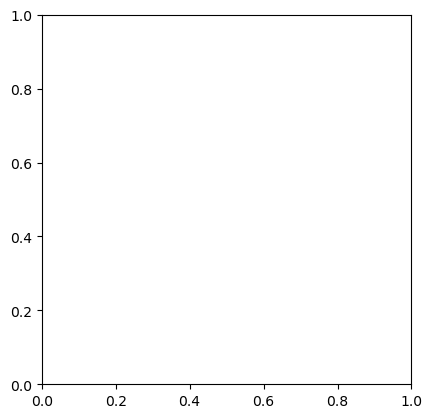

In [113]:
plt.imshow(image)

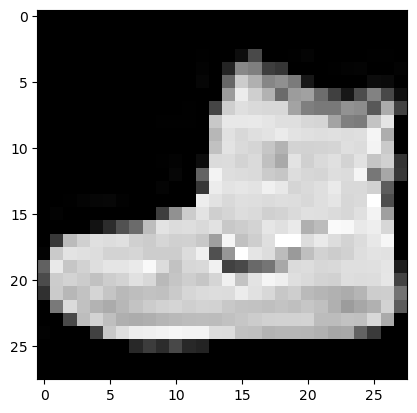

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")

In [ ]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
# Pass image through model
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

In [ ]:
image.shape

torch.Size([1, 28, 28])

Go through CNN networks online on Google CNN explorer.

### 7.1 Stepping through `nn.Conv2d()`

In [ ]:
# Let's create some dummy data
torch.manual_seed(42)

# Create a batch of images
images = torch.rand(size=(32, 3, 64, 64)) # (batch_size, color_channels, height, width)
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")


Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

        [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
         [0.7310, 0

### Make sure to explore the CNN playground.

In [ ]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3, # number of input channels
                       out_channels=10, # number of output channels
                       kernel_size=(3, 3), # height/width of filter
                       stride=1, # how many pixels the filter moves each time
                       padding=0) # padding added to each side of the input
conv_output = conv_layer(test_image.unsqueeze(0)) # unsqueeze to add batch dimension (1, 3, 64, 64
conv_output.shape

torch.Size([1, 10, 62, 62])

In [ ]:
test_image.unsqueeze(0)

tensor([[[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
          [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
          [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
          ...,
          [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
          [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
          [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

         [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
          [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
          [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
          ...,
          [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
          [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
          [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

         [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
          [0.7310, 0.9307, 0.2847,  ..., 0.8432, 0.8307, 0.0897],
          [0.7021, 0.5967, 0.7744,  ..., 0

### 7.2 Stepping through nn.MaxPoo12d

In [ ]:
# Print out original image shape without unsqueeze dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueeze shape: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through conv layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer()and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")


Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueeze shape: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer()and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [ ]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions as our images
random_tensor = torch.rand(size=(1, 1, 2, 2))
max_pool_layer = nn.MaxPool2d(kernel_size=2)
print(f"\nRandom tensor:\n {random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Pass random tensor through max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")



Random tensor:
 tensor([[[[0.8823, 0.9150],
          [0.3829, 0.9593]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.9593]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


 ### 7.3 Setup a loss function and optimizer for model_2

In [ ]:
# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)



### 7.4 Training and testing 'model_2' using our training and test functions

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.59355, Train accuracy: 78.48%


 33%|███▎      | 1/3 [00:56<01:53, 56.90s/it]

Test loss: 0.40828 | Test accuracy: 85.40%

Epoch: 1
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.36563, Train accuracy: 86.82%


 67%|██████▋   | 2/3 [01:49<00:54, 54.51s/it]

Test loss: 0.36302 | Test accuracy: 86.39%

Epoch: 2
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.32580, Train accuracy: 88.16%


100%|██████████| 3/3 [02:38<00:00, 52.98s/it]

Test loss: 0.33149 | Test accuracy: 87.95%

Train time on cpu: 158.953 seconds


In [115]:
# Get model_2 results
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 2.3023064136505127,
 'model_acc': 9.994009584664537}

In [ ]:
# Get model_2 results
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.331485778093338,
 'model_acc': 87.94928115015975}

## 8. Compare model results

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModel,0.510876,82.378195
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.331486,87.949281


In [ ]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModel,0.510876,82.378195,11.082800
1,FashionMNISTModelV1,0.685001,75.019968,13.391862
2,FashionMNISTModelV2,0.331486,87.949281,158.953190


Text(0, 0.5, 'model')

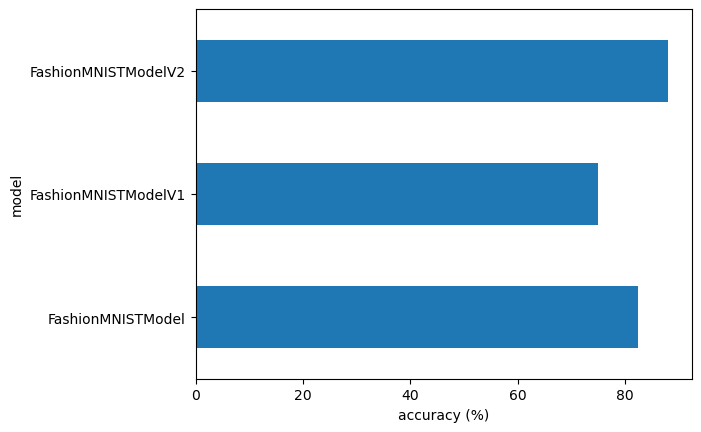

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## 9. Make and evaluate random predictions

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.eval() # put model in eval mode
    with torch.inference_mode():
        for sample in data: 
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass (model ouputs raw logits)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediciton probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

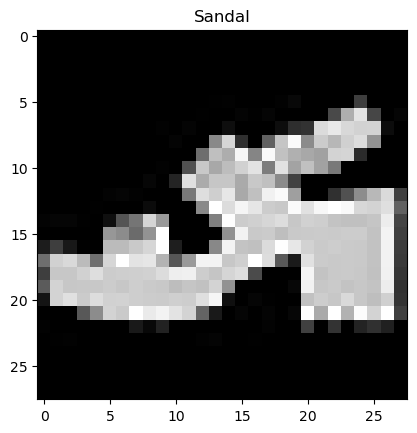

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions on the samples
pred_probs = make_predictions(model=model_2,
                                data=test_samples)
# View first two prediction probabilities
pred_probs[:2]

tensor([[1.3152e-06, 9.2834e-07, 8.8130e-07, 8.6436e-06, 3.7978e-07, 9.9737e-01,
         1.1206e-05, 4.3297e-04, 6.5283e-04, 1.5223e-03],
        [3.2231e-02, 4.5375e-01, 3.3602e-03, 4.3849e-01, 2.8862e-02, 1.3026e-04,
         4.1602e-02, 9.5445e-04, 3.2385e-04, 2.9226e-04]])

In [ ]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [ ]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

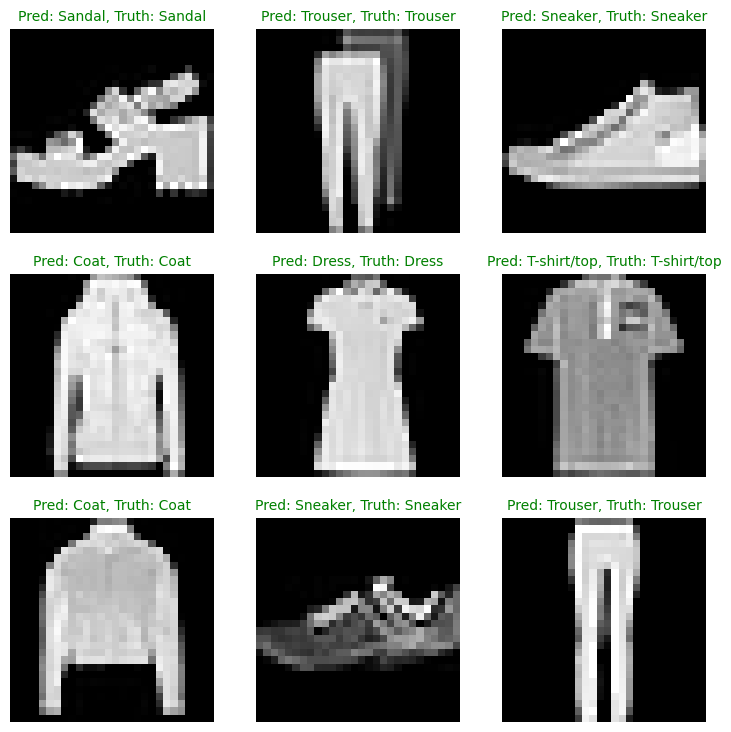

In [ ]:
# Plot the predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    
    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")

    # Find the prediction (in text form, e.g. "Sandal")
    pred_label = class_names[pred_classes[i]]

    # Get the truth label (in text form)
    truth_label = class_names[test_labels[i]]

    # Create title for the plot
    title_text = f"Pred: {pred_label}, Truth: {truth_label}"

    # Check equality between pred and truth and change color of the title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g") # Green text if prediction same as truth
    else:
        plt.title(title_text, fontsize=10, c="r")

    # Turn axis ticks off
    plt.axis(False)

## 10. Making a confusion matrix for further prediction evaluation

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix torchmetrics.ConfusionMatrix'
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`
4. 



In [ ]:
# Import tqdm.auto for progress bars
from tqdm.auto import tqdm

# 1. Make prediction with trained model
y_preds = []
model_2.eval() # put model in eval mode
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions..."):
        # Send the data and targets to target device
        X, y = X.to(device), y.to(device)
        # Do the forward pass
        y_logit = model_2(X)
        # Turn predictions from logits -> prediction probabilities -> prediction labels
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        # Put prediction on CPU for evaluation
        y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...: 100%|██████████| 313/313 [00:01<00:00, 202.25it/s]


tensor([9, 2, 4,  ..., 9, 4, 3])

In [ ]:
len(y_pred_tensor)

10000

In [ ]:
import mlxtend
print()

0.23.0


In [ ]:
# See if required packages are installed and if not, install them...
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
except:
    print("Installing mlxtend...")
    %pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")


mlxtend version: 0.23.0


In [ ]:
assert str(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be 0.19.0 or higher")

TypeError: '>=' not supported between instances of 'str' and 'int'

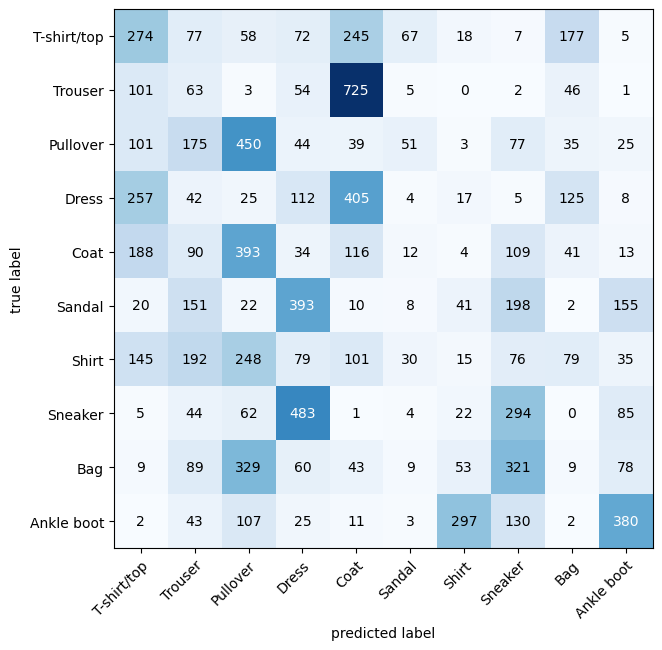

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task="MULTICLASS")
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),  # Matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10, 7)
)


## 11. Save and load best performing model

In [ ]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [117]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                        hidden_units=10,
                                        output_shape=len(class_names)).to(device)

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# Evaluate loaded model
loaded_model_2_results = eval_model(model=loaded_model_2,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn)
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 2.3023064136505127,
 'model_acc': 9.994009584664537}

In [ ]:
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 2.3023064136505127,
 'model_acc': 9.994009584664537}

In [118]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]), torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02)

tensor(True)

### CNN Explainer check this out